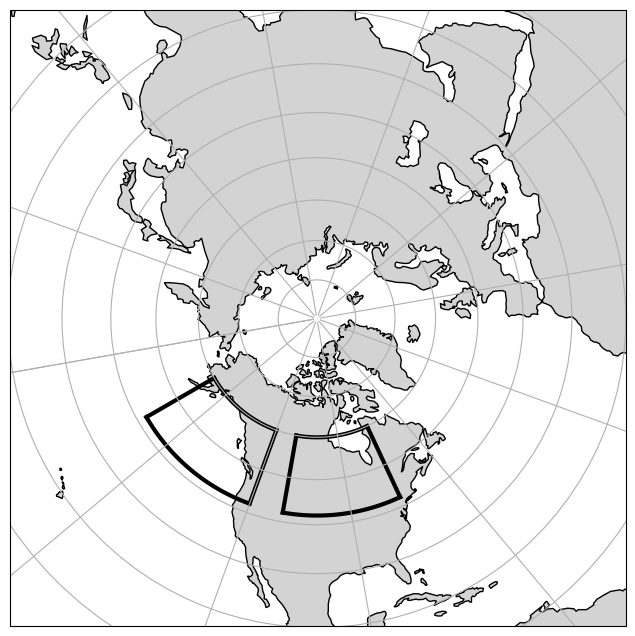

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# April 28, 2025 | sglanvil

# List of boxes: (lon_min, lon_max, lat_min, lat_max)
boxes = [
    (-160, -120, 42, 60),  # Off British Columbia / Washington State
    (-110, -75, 42, 60),    # Over Hudson Bay
]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8),
                       subplot_kw={'projection': ccrs.NorthPolarStereo(central_longitude=-100)})

# Set extent
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines()

# Loop over each box
for lon_min, lon_max, lat_min, lat_max in boxes:
    # Generate points along the edges
    lons_bottom = np.linspace(lon_min, lon_max, 100)
    lats_bottom = np.full_like(lons_bottom, lat_min)
    lons_top = np.linspace(lon_min, lon_max, 100)
    lats_top = np.full_like(lons_top, lat_max)
    lats_left = np.linspace(lat_min, lat_max, 100)
    lons_left = np.full_like(lats_left, lon_min)
    lats_right = np.linspace(lat_min, lat_max, 100)
    lons_right = np.full_like(lats_right, lon_max)

    # Plot each side
    ax.plot(lons_bottom, lats_bottom, color='black', linewidth=3, transform=ccrs.PlateCarree())
    ax.plot(lons_top, lats_top, color='black', linewidth=3, transform=ccrs.PlateCarree())
    ax.plot(lons_left, lats_left, color='black', linewidth=3, transform=ccrs.PlateCarree())
    ax.plot(lons_right, lats_right, color='black', linewidth=3, transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=False)
gl.xlocator = plt.MultipleLocator(30)
gl.ylocator = plt.MultipleLocator(10)
plt.savefig("/glade/work/sglanvil/CCR/S2S_windowsOfOpportunity/figures/Z500_boxes_map.png", dpi=300)
plt.show()


In [57]:
import xarray as xr
import regionmask

ds = xr.open_dataset('/glade/campaign/cesm/development/cross-wg/S2S/sglanvil/data/zg_500_ERA5_19990101-20211231.nc')
var = ds['zg_500']
states = regionmask.defined_regions.natural_earth_v5_0_0.us_states_50
mask = states.mask(var)
region_groups = {
    'South': ['Kansas', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana', 'Mississippi'],
    'Southwest': ['Colorado', 'Arizona', 'Utah', 'New Mexico'],
    'West': ['California', 'Nevada'],
    'Northwest': ['Washington', 'Oregon', 'Idaho'],
    'RockiesPlains': ['Montana', 'Wyoming', 'North Dakota', 'South Dakota', 'Nebraska'],
    'UpperMidwest': ['Minnesota', 'Iowa', 'Wisconsin', 'Michigan'],
    'OhioValley': ['Missouri', 'Illinois', 'Indiana', 'Ohio', 'West Virginia', 'Kentucky', 'Tennessee'],
    'Southeast': ['Alabama', 'Georgia', 'Florida', 'South Carolina', 'North Carolina', 'Virginia'],
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'New York', 'Pennsylvania', 'Maryland', 
                  'Delaware', 'New Jersey', 'Connecticut', 'Rhode Island', 'Massachusetts', 'District of Columbia']
}
region_means = {}
for region_name in region_groups:
    region_mask = mask.isin([states.map_keys(state) for state in region_groups[region_name]])
    region_mean = var.where(region_mask).mean(dim=["lat", "lon"], skipna=True)
    print(region_mean.values)
    # region_means[region_name] = region_mean


[51310.27  53443.316 54444.812 ... 54145.117 54126.96  53911.2  ]
[55496.418 54524.062 54149.57  ... 55463.676 55725.043 55789.527]
[54931.895 55214.707 54760.56  ... 53609.742 54214.855 53966.273]
[56081.715 56448.188 56218.24  ... 53354.707 53955.977 53798.484]
[55204.277 55504.56  55676.47  ... 52187.723 52560.863 51950.88 ]
[53698.945 53231.902 52923.535 ... 51703.535 51853.145 51831.207]
[52705.89  52905.84  51268.277 ... 52548.477 52385.676 52502.918]
[54439.77  54226.78  52456.344 ... 54945.324 54835.414 54910.21 ]
[55738.19  55840.316 55276.48  ... 56743.652 56634.164 56591.28 ]
[51310.27  53443.316 54444.812 ... 54145.117 54126.96  53911.2  ]


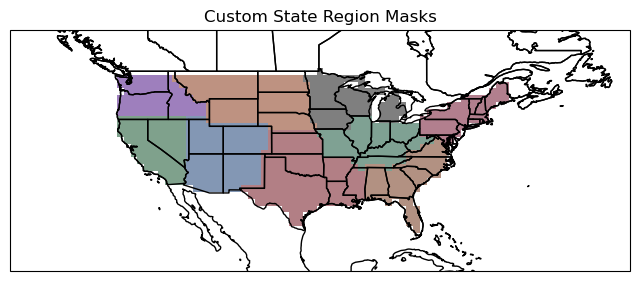

In [124]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

cmap_list = ['Reds', 'Blues', 'Greens', 'Purples', 'Oranges', 'Greys', 'YlGn', 'YlOrBr', 'PuRd']
plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
for i, (region_name, state_list) in enumerate(region_groups.items()):
    region_mask = mask.isin([states.map_keys(state) for state in state_list])
    region_mask.where(region_mask).plot(ax=ax, transform=ccrs.PlateCarree(), 
        cmap=cmap_list[i % len(cmap_list)], vmin=0, vmax=1, add_colorbar=False, alpha=0.5)
ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='black', linewidth=1)
ax.coastlines()
ax.set_xlim(-140, -50)
ax.set_ylim(20, 55)
plt.title('Custom State Region Masks')
plt.savefig("/glade/work/sglanvil/CCR/S2S_windowsOfOpportunity/figures/US_regions_map.png", dpi=300)
plt.show()
